# Module 6 - Wrap-Up Quiz

## Data Import

In [1]:
import pandas as pd

dataset = pd.read_csv("../datasets/penguins.csv")

feature_names = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)",
    "Flipper Length (mm)",
]
target_name = "Body Mass (g)"

dataset = dataset[feature_names + [target_name]].dropna(axis="rows", how="any")
dataset = dataset.sample(frac=1, random_state=0).reset_index(drop=True)
data, target = dataset[feature_names], dataset[target_name]

## Baseline Model Evaluation

### Decision Tree Regressor

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

baseline_DTR = DecisionTreeRegressor(random_state=0)

blDTR_cv_results = cross_validate(baseline_DTR, data, target, cv=10, return_train_score=True)

### Random Forest Regressor

In [3]:
from sklearn.ensemble import RandomForestRegressor

baseline_RFR = RandomForestRegressor(random_state=0)

blRFR_cv_results = cross_validate(baseline_RFR, data, target, cv=10, return_train_score=True)

### Model Comparison

In [13]:
print(f"{baseline_DTR.__class__.__name__}\n{'-'*len(baseline_DTR.__class__.__name__)}\n"
      f"Mean Test Score: {blDTR_cv_results['test_score'].mean():.4f}"
      f" ± {blDTR_cv_results['test_score'].std():.4f}\n")

print(f"{baseline_RFR.__class__.__name__}\n{'-'*len(baseline_RFR.__class__.__name__)}\n"
      f"Mean Test Score: {blRFR_cv_results['test_score'].mean():.4f}"
      f" ± {blRFR_cv_results['test_score'].std():.4f}\n")

RFR_DTR_comparison = sum(blRFR_cv_results['test_score'] > blDTR_cv_results['test_score'])

print(f"{baseline_RFR.__class__.__name__} out performs {baseline_DTR.__class__.__name__} "
      f"{RFR_DTR_comparison} times out of {len(blDTR_cv_results['test_score'])}")

DecisionTreeRegressor
---------------------
Mean Test Score: 0.6275 ± 0.0997

RandomForestRegressor
---------------------
Mean Test Score: 0.8036 ± 0.0447

RandomForestRegressor out performs DecisionTreeRegressor 10 times out of 10


## Random Forest with 5 & 100 decision tress

### Setting `n_estimators` to 5

In [28]:
baseline_RFR.set_params(n_estimators=5)
print(f"n_estimators is {baseline_RFR.get_params()['n_estimators']}")

blRFR_n5_cv_results = cross_validate(baseline_RFR, data, target, cv=10, return_train_score=True)

n_estimators is 5


The default `n_estimators` is 100. Thus, the previous cv results for Random Forest can be used for the comparison.

In [29]:
print(f"{baseline_DTR.__class__.__name__}\n{'-'*len(baseline_DTR.__class__.__name__)}\n"
      f"Mean Test Score: {blRFR_n5_cv_results['test_score'].mean():.4f}"
      f" ± {blRFR_n5_cv_results['test_score'].std():.4f}\n")

print(f"{baseline_RFR.__class__.__name__}\n{'-'*len(baseline_RFR.__class__.__name__)}\n"
      f"Mean Test Score: {blRFR_cv_results['test_score'].mean():.4f}"
      f" ± {blRFR_cv_results['test_score'].std():.4f}\n")

n100_n5_comparison = sum(blRFR_cv_results['test_score'] > blRFR_n5_cv_results['test_score'])

print(f"`n = 100` out performs `n = 5` "
      f"{n100_n5_comparison} times out of {len(blRFR_cv_results['test_score'])}")

DecisionTreeRegressor
---------------------
Mean Test Score: 0.7669 ± 0.0736

RandomForestRegressor
---------------------
Mean Test Score: 0.8036 ± 0.0447

`n = 100` out performs `n = 5` 9 times out of 10


Adding trees in the forest helps improving the generalization performance of the model.

We can also get more insights by comparing the test and training scores of each model:

In [33]:
print(
    "Scores for random forest with 5 trees:\n"
    f"train: {blRFR_n5_cv_results['train_score'].mean():.3f} ± "
    f"{blRFR_n5_cv_results['train_score'].std():.3f} || "
    f"test: {blRFR_n5_cv_results['test_score'].mean():.3f} ± "
    f"{blRFR_n5_cv_results['test_score'].std():.3f}"
)
print(    
    "Scores for random forest with 100 trees:\n"
    f"train: {blRFR_cv_results['train_score'].mean():.3f} ± "
    f"{blRFR_cv_results['train_score'].std():.3f} || "
    f"test: {blRFR_cv_results['test_score'].mean():.3f} ± "
    f"{blRFR_cv_results['test_score'].std():.3f}"
  )

Scores for random forest with 5 trees:
train: 0.950 ± 0.003 || test: 0.767 ± 0.074
Scores for random forest with 100 trees:
train: 0.972 ± 0.001 || test: 0.804 ± 0.045


On the model with 5 trees, the average train score was already quite high but the test scores were quite low. The performance of this small random forest is therefore primarily limited by overfitting.

In the forest with 100 trees, the train score is still high (even slightly higher), and the test scores have increased. Overfitting was reduced by adding more trees to the forest.

## Validation Curves

### Validation curve of `n_estimators` with default `max_depth`

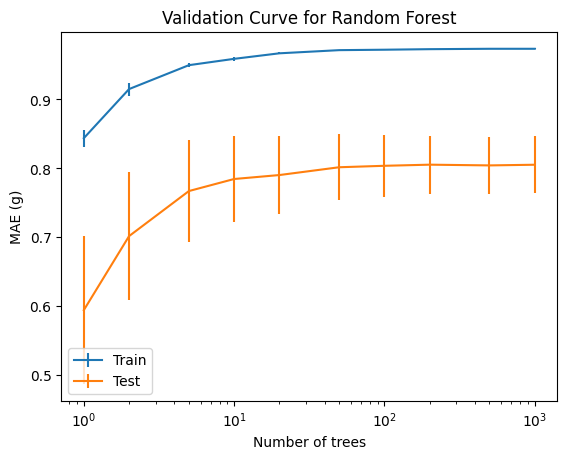

In [35]:
import numpy as np
from sklearn.model_selection import ValidationCurveDisplay

n_estimators = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000])

disp = ValidationCurveDisplay.from_estimator(
    baseline_RFR,
    data,
    target,
    param_name="n_estimators",
    param_range=n_estimators,
    cv=10,
    scoring="r2",
    score_name="R2 Score",
    std_display_style="errorbar",
    n_jobs=2,
)
_ = disp.ax_.set(
    xlabel="Number of trees",
    ylabel="MAE (g)",
    title="Validation Curve for Random Forest",
)

We observe that above 500 trees, both the train and test scores become nearly constant. This diminishing returns effect is typical of Random Forests and bagging ensembles in general.

### Validation curve of `n_estimators` with `max_depth = 5`

`max_depth` = None
`max_depth` = 5


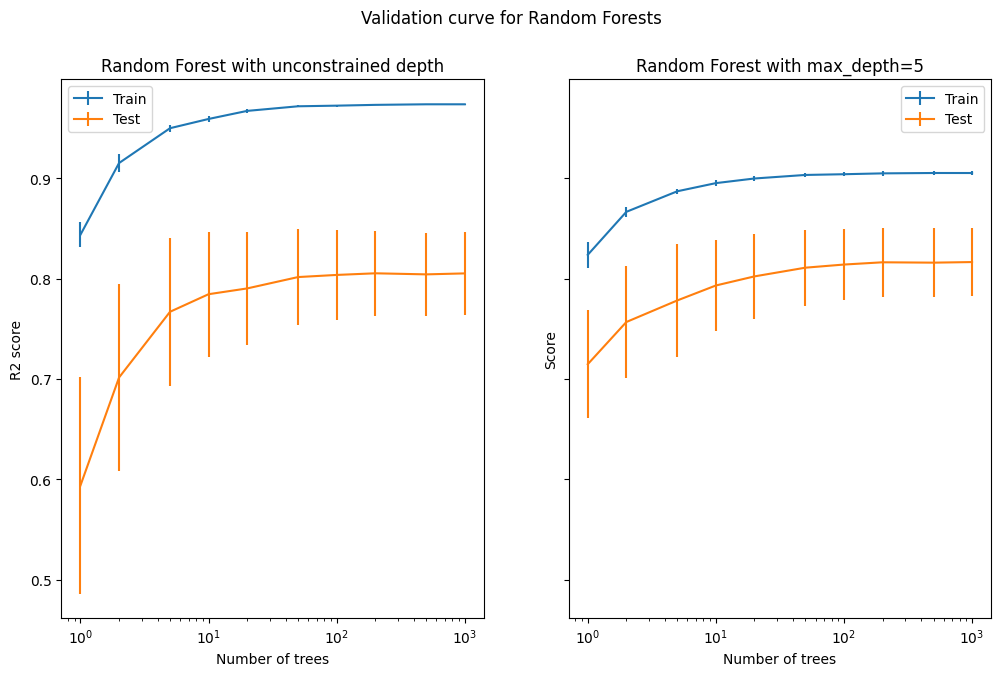

In [42]:
import matplotlib.pyplot as plt

cv =10

baseline_RFR.set_params(max_depth=None)
print(f"`max_depth` = {baseline_RFR.get_params()['max_depth']}")

fig, axs = plt.subplots(ncols=2, figsize=(12, 7),  sharey=True)
ValidationCurveDisplay.from_estimator(
    baseline_RFR,
    data,
    target,
    param_name="n_estimators",
    param_range=n_estimators,
    scoring="r2",
    score_name="R2 score",
    std_display_style="errorbar",
    cv=cv,
    n_jobs=2,
    ax=axs[0]
)

baseline_RFR.set_params(max_depth=5)
print(f"`max_depth` = {baseline_RFR.get_params()['max_depth']}")

ValidationCurveDisplay.from_estimator(
    baseline_RFR,
    data,
    target,
    param_name="n_estimators",
    param_range=n_estimators,
    std_display_style="errorbar",
    cv=cv,
    n_jobs=2,
    ax=axs[1],
)

axs[0].set(
    xlabel="Number of trees",
    title="Random Forest with unconstrained depth",
)
axs[1].set(
    xlabel="Number of trees",
    title="Random Forest with max_depth=5",
)
_ = fig.suptitle("Validation curve for Random Forests")

We see that decreasing the depth reduces the gap between the train and test scores. We also see that the random forest with limited depth has a better generalization performance for a small number of trees but becomes equivalent for higher numbers of trees. We can conclude that the random forest models with a limited depth overfit less than the random forest with fully grown trees, especially when the number of trees in the ensemble is small.

One can also observe that the limiting the depth has a significant effect on limiting the training score (ability to memorize exactly the training data) and that this effect remains important, even when increasing the size of the ensemble.